In [15]:

import numpy as np
from datetime import datetime
import re
from collections import Counter
import matplotlib.pyplot as plt
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns

In [16]:
import re
import pandas as pd

log_pattern = r'(?P<ip>\S+) (?P<identity>\S+) (?P<user>\S+) \[(?P<timestamp>.*?)\] "(?P<request>.*?)" (?P<status>\d{3}) (?P<size>\S+)'

file_path = "C:/Users/Shrivastava/Downloads/calgary_access_log"
data = []

#  Add encoding='utf-8' with error handling
with open(file_path, "r", encoding="utf-8", errors="ignore") as file:
    for line in file:
        match = re.match(log_pattern, line)
        if match:
            data.append(match.groupdict())

df = pd.DataFrame(data)
print(df.head())
df.to_csv("parsed_log_output.csv", index=False)
print("Data exported to parsed_log_output.csv")



      ip identity user                   timestamp                  request  \
0  local        -    -  24/Oct/1994:13:41:41 -0600  GET index.html HTTP/1.0   
1  local        -    -  24/Oct/1994:13:41:41 -0600       GET 1.gif HTTP/1.0   
2  local        -    -  24/Oct/1994:13:43:13 -0600  GET index.html HTTP/1.0   
3  local        -    -  24/Oct/1994:13:43:14 -0600       GET 2.gif HTTP/1.0   
4  local        -    -  24/Oct/1994:13:43:15 -0600       GET 3.gif HTTP/1.0   

  status   size  
0    200    150  
1    200   1210  
2    200   3185  
3    200   2555  
4    200  36403  
Data exported to parsed_log_output.csv


In [17]:
file_path = "parsed_log_output.csv"
df = pd.read_csv(file_path)
print(df)

           ip identity user                   timestamp  \
0       local        -    -  24/Oct/1994:13:41:41 -0600   
1       local        -    -  24/Oct/1994:13:41:41 -0600   
2       local        -    -  24/Oct/1994:13:43:13 -0600   
3       local        -    -  24/Oct/1994:13:43:14 -0600   
4       local        -    -  24/Oct/1994:13:43:15 -0600   
...       ...      ...  ...                         ...   
724905  local        -    -  11/Oct/1995:14:11:39 -0600   
724906  local        -    -  11/Oct/1995:14:11:40 -0600   
724907  local        -    -  11/Oct/1995:14:11:45 -0600   
724908  local        -    -  11/Oct/1995:14:11:58 -0600   
724909  local        -    -  11/Oct/1995:14:14:17 -0600   

                        request  status   size  
0       GET index.html HTTP/1.0     200    150  
1            GET 1.gif HTTP/1.0     200   1210  
2       GET index.html HTTP/1.0     200   3185  
3            GET 2.gif HTTP/1.0     200   2555  
4            GET 3.gif HTTP/1.0     200  36403

Dataset Overview:
Total records: 724910

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 724910 entries, 0 to 724909
Data columns (total 7 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   ip         724910 non-null  object
 1   identity   724910 non-null  object
 2   user       724910 non-null  object
 3   timestamp  724910 non-null  object
 4   request    724910 non-null  object
 5   status     724910 non-null  int64 
 6   size       724910 non-null  object
dtypes: int64(1), object(6)
memory usage: 38.7+ MB
None

First few rows:
      ip identity user                   timestamp                  request  \
0  local        -    -  24/Oct/1994:13:41:41 -0600  GET index.html HTTP/1.0   
1  local        -    -  24/Oct/1994:13:41:41 -0600       GET 1.gif HTTP/1.0   
2  local        -    -  24/Oct/1994:13:43:13 -0600  GET index.html HTTP/1.0   
3  local        -    -  24/Oct/1994:13:43:14 -0600       GET 2.gif HTTP/1.0   
4  loca

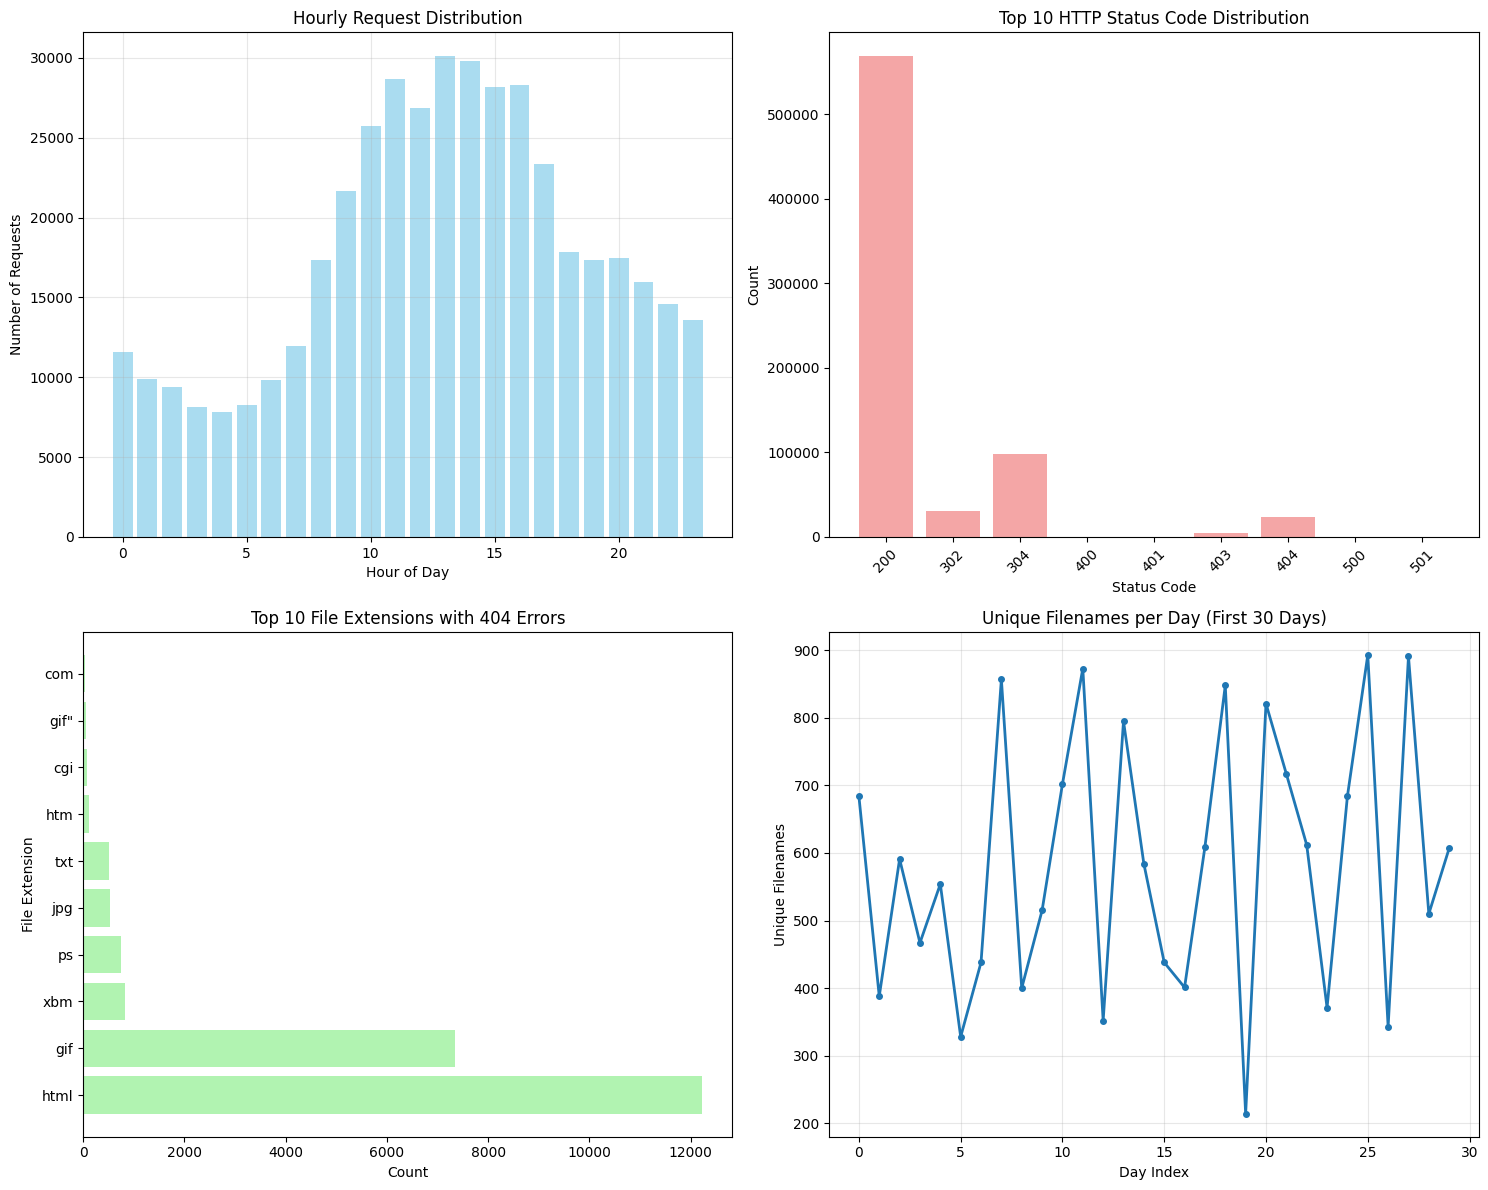

Analysis completed successfully!

Dataset contains 724,910 log entries spanning from 1994-10-24 13:41:41-06:00 to 1995-10-11 14:14:17-06:00


In [18]:


# Load the parsed data
file_path = "parsed_log_output.csv"
df = pd.read_csv(file_path)

print("Dataset Overview:")
print(f"Total records: {len(df)}")
print("\nDataset Info:")
print(df.info())
print("\nFirst few rows:")
print(df.head())

# Data Cleaning and Preprocessing
print("\n" + "="*50)
print("DATA CLEANING AND PREPROCESSING")
print("="*50)

# Convert timestamp to datetime
def parse_timestamp(timestamp_str):
    try:
        return pd.to_datetime(timestamp_str, format='%d/%b/%Y:%H:%M:%S %z', errors='raise')
    except Exception:
        return pd.NaT

df['datetime'] = df['timestamp'].apply(parse_timestamp)
# Convert the column to datetime dtype, coercing errors to NaT (safe)
df['datetime'] = pd.to_datetime(df['datetime'], errors='coerce')


# Extract filename from request
def extract_filename(request_str):
    """Extract filename from HTTP request"""
    try:
        # Request format: "GET filename HTTP/1.0"
        parts = request_str.split()
        if len(parts) >= 2:
            return parts[1]
        return None
    except:
        return None

df['filename'] = df['request'].apply(extract_filename)

# Extract file extension
def extract_extension(filename):
    """Extract file extension from filename"""
    if filename and '.' in filename:
        return filename.split('.')[-1].lower()
    return 'no_extension'

df['extension'] = df['filename'].apply(extract_extension)

# Convert size to numeric, handling '-' values
def convert_size(size_str):
    """Convert size string to numeric, handling missing values"""
    if size_str == '-' or pd.isna(size_str):
        return 0
    try:
        return int(size_str)
    except:
        return 0

df['size_numeric'] = df['size'].apply(convert_size)

# Extract date components
df['date'] = df['datetime'].dt.date
df['hour'] = df['datetime'].dt.hour
df['date_str'] = df['datetime'].dt.strftime('%d-%b-%Y')

print("Data preprocessing completed!")
print(f"Records with valid datetime: {df['datetime'].notna().sum()}")
print(f"Records with valid filename: {df['filename'].notna().sum()}")

# ANALYSIS QUESTIONS
print("\n" + "="*50)
print("ANALYSIS QUESTIONS")
print("="*50)

# Q1: Count of total log records
def q1_total_records():
    """Q1: Count the total number of HTTP requests in the log file"""
    total = len(df)
    print(f"Q1: Total log records: {total}")
    return total

q1_result = q1_total_records()

# Q2: Count of unique hosts
def q2_unique_hosts():
    """Q2: Determine the number of distinct hosts that accessed the server"""
    unique_hosts = df['ip'].nunique()
    print(f"Q2: Unique hosts: {unique_hosts}")
    return unique_hosts

q2_result = q2_unique_hosts()

# Q3: Date-wise unique filename counts
def q3_datewise_filename_counts():
    """Q3: For each date, count how many unique filenames were requested"""
    # Filter out null filenames and dates
    valid_data = df.dropna(subset=['filename', 'date_str'])
    
    date_filename_counts = {}
    for date_str in valid_data['date_str'].unique():
        date_data = valid_data[valid_data['date_str'] == date_str]
        unique_filenames = date_data['filename'].nunique()
        date_filename_counts[date_str] = unique_filenames
    
    # Sort by date
    sorted_dates = dict(sorted(date_filename_counts.items()))
    
    print(f"Q3: Date-wise unique filename counts (showing first 10):")
    for i, (date, count) in enumerate(sorted_dates.items()):
        if i < 10:
            print(f"  {date}: {count}")
        else:
            break
    
    return sorted_dates

q3_result = q3_datewise_filename_counts()

# Q4: Number of 404 response codes
def q4_count_404():
    """Q4: Count how many HTTP requests resulted in a 404 response"""
    count_404 = (df['status'] == 404).sum()
    print(f"Q4: Number of 404 responses: {count_404}")
    return count_404

q4_result = q4_count_404()

# Q5: Top 15 filenames with 404 responses
def q5_top_404_filenames():
    """Q5: Find the 15 most requested URLs that resulted in a 404 error"""
    df_404 = df[df['status'] == 404]
    filename_counts = df_404['filename'].value_counts().head(15)
    
    result = [(filename, count) for filename, count in filename_counts.items()]
    
    print(f"Q5: Top 15 filenames with 404 responses:")
    for i, (filename, count) in enumerate(result, 1):
        print(f"  {i}. {filename}: {count}")
    
    return result

q5_result = q5_top_404_filenames()

# Q6: Top 15 file extensions with 404 responses
def q6_top_404_extensions():
    """Q6: Identify the file extensions that caused the most 404 errors"""
    df_404 = df[df['status'] == 404]
    extension_counts = df_404['extension'].value_counts().head(15)
    
    result = [(ext, count) for ext, count in extension_counts.items()]
    
    print(f"Q6: Top 15 file extensions with 404 responses:")
    for i, (ext, count) in enumerate(result, 1):
        print(f"  {i}. {ext}: {count}")
    
    return result

q6_result = q6_top_404_extensions()

# Q7: Total bandwidth transferred per day for July 1995
def q7_july_1995_bandwidth():
    """Q7: Sum the bytes transferred per day for July 1995"""
    # Filter for July 1995
    july_1995 = df[df['datetime'].dt.strftime('%b-%Y') == 'Jul-1995'].copy()
    
    # Only consider records with valid size (not 0 or missing)
    july_1995_valid = july_1995[july_1995['size_numeric'] > 0]
    
    daily_bandwidth = {}
    for date_str in july_1995_valid['date_str'].unique():
        date_data = july_1995_valid[july_1995_valid['date_str'] == date_str]
        total_bytes = date_data['size_numeric'].sum()
        daily_bandwidth[date_str] = total_bytes
    
    # Sort by date
    sorted_bandwidth = dict(sorted(daily_bandwidth.items()))
    
    print(f"Q7: Daily bandwidth for July 1995 (showing first 10 days):")
    for i, (date, bytes_transferred) in enumerate(sorted_bandwidth.items()):
        if i < 10:
            print(f"  {date}: {bytes_transferred:,} bytes")
        else:
            break
    
    return sorted_bandwidth

q7_result = q7_july_1995_bandwidth()

# Q8: Hourly request distribution
def q8_hourly_distribution():
    """Q8: Count how many HTTP requests occurred during each hour (0–23)"""
    valid_hours = df.dropna(subset=['hour'])
    hourly_counts = valid_hours['hour'].value_counts().sort_index()
    
    result = {hour: count for hour, count in hourly_counts.items()}
    
    print(f"Q8: Hourly request distribution:")
    for hour in range(24):
        count = result.get(hour, 0)
        print(f"  Hour {hour:2d}: {count:,}")
    
    return result

q8_result = q8_hourly_distribution()

# Q9: Top 10 most requested filenames
def q9_top_filenames():
    """Q9: Identify the top 10 most frequently requested filenames"""
    valid_filenames = df.dropna(subset=['filename'])
    filename_counts = valid_filenames['filename'].value_counts().head(10)
    
    result = [(filename, count) for filename, count in filename_counts.items()]
    
    print(f"Q9: Top 10 most requested filenames:")
    for i, (filename, count) in enumerate(result, 1):
        print(f"  {i}. {filename}: {count:,}")
    
    return result

q9_result = q9_top_filenames()

# Q10: HTTP response code distribution
def q10_status_code_distribution():
    """Q10: Count the occurrences of each HTTP response status code"""
    status_counts = df['status'].value_counts().sort_index()
    
    result = {status: count for status, count in status_counts.items()}
    
    print(f"Q10: HTTP response code distribution:")
    for status, count in sorted(result.items()):
        print(f"  {status}: {count:,}")
    
    return result

q10_result = q10_status_code_distribution()

# Summary of Results
print("\n" + "="*50)
print("SUMMARY OF RESULTS")
print("="*50)

results_summary = {
    'Q1_total_records': q1_result,
    'Q2_unique_hosts': q2_result,
    'Q3_datewise_filename_counts': len(q3_result),
    'Q4_404_count': q4_result,
    'Q5_top_404_filenames': len(q5_result),
    'Q6_top_404_extensions': len(q6_result),
    'Q7_july_bandwidth_days': len(q7_result),
    'Q8_hourly_distribution': len(q8_result),
    'Q9_top_filenames': len(q9_result),
    'Q10_status_codes': len(q10_result)
}

for key, value in results_summary.items():
    print(f"{key}: {value}")

# Create some visualizations
print("\n" + "="*50)
print("VISUALIZATIONS")
print("="*50)

# Set up the plotting style
plt.style.use('default')
fig, axes = plt.subplots(2, 2, figsize=(15, 12))

# 1. Hourly request distribution
hours = list(range(24))
hourly_requests = [q8_result.get(hour, 0) for hour in hours]
axes[0, 0].bar(hours, hourly_requests, color='skyblue', alpha=0.7)
axes[0, 0].set_title('Hourly Request Distribution')
axes[0, 0].set_xlabel('Hour of Day')
axes[0, 0].set_ylabel('Number of Requests')
axes[0, 0].grid(True, alpha=0.3)

# 2. Top 10 status codes
status_codes = list(q10_result.keys())[:10]
status_counts = [q10_result[code] for code in status_codes]
axes[0, 1].bar([str(code) for code in status_codes], status_counts, color='lightcoral', alpha=0.7)
axes[0, 1].set_title('Top 10 HTTP Status Code Distribution')
axes[0, 1].set_xlabel('Status Code')
axes[0, 1].set_ylabel('Count')
axes[0, 1].tick_params(axis='x', rotation=45)

# 3. Top 10 file extensions with 404s
if q6_result:
    ext_names = [item[0] for item in q6_result[:10]]
    ext_counts = [item[1] for item in q6_result[:10]]
    axes[1, 0].barh(ext_names, ext_counts, color='lightgreen', alpha=0.7)
    axes[1, 0].set_title('Top 10 File Extensions with 404 Errors')
    axes[1, 0].set_xlabel('Count')
    axes[1, 0].set_ylabel('File Extension')

# 4. Daily requests trend (sample of dates)
sample_dates = list(q3_result.keys())[:30]  # First 30 dates
sample_counts = [q3_result[date] for date in sample_dates]
axes[1, 1].plot(range(len(sample_dates)), sample_counts, marker='o', linewidth=2, markersize=4)
axes[1, 1].set_title('Unique Filenames per Day (First 30 Days)')
axes[1, 1].set_xlabel('Day Index')
axes[1, 1].set_ylabel('Unique Filenames')
axes[1, 1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

print("Analysis completed successfully!")
print(f"\nDataset contains {len(df):,} log entries spanning from {df['datetime'].min()} to {df['datetime'].max()}")